In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    closed = df.recovered+df.deaths
    hospitalized = df.confirmed - closed
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(closed,dashes=[2,2,6, 2],c='y',label='closed')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('closed: ',closed.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/closed.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('closed')
    plt.ylabel('deaths')
    plt.show()


In [3]:
# for c in json.columns:
#     print(c)


     date  confirmed  deaths  recovered
 2020-5-9       3004      56       2787
new  confirmed
       4.0


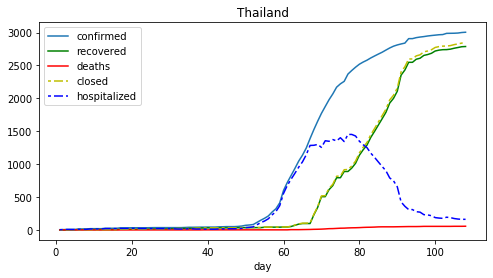

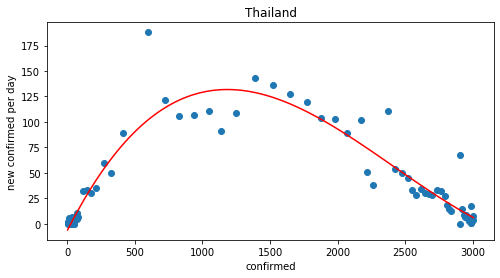

closed:  2843
deaths:  56
%:  1.9697502638058388


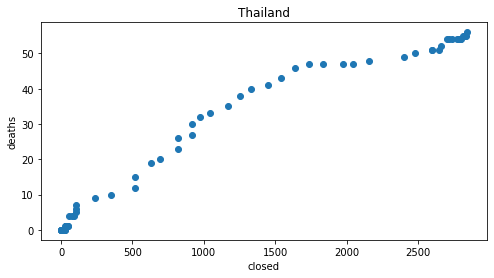

     date  confirmed  deaths  recovered
 2020-5-9     198676    1827      31916
new  confirmed
   10817.0


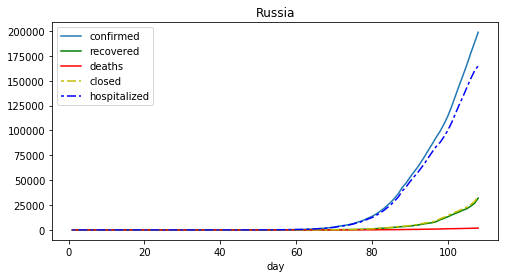

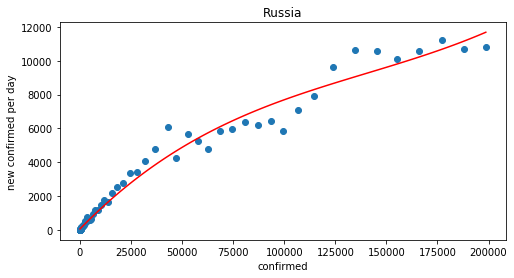

closed:  33743
deaths:  1827
%:  5.414456331683608


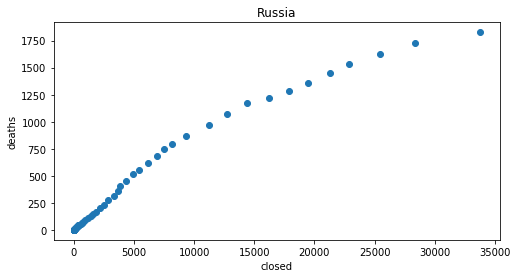

     date  confirmed  deaths  recovered
 2020-5-9      33460    3353      21824
new  confirmed
    1938.0


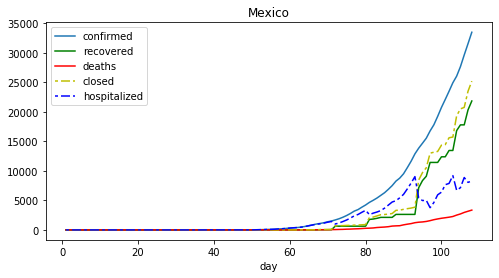

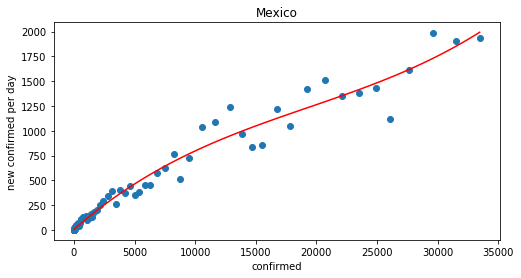

closed:  25177
deaths:  3353
%:  13.317710608889065


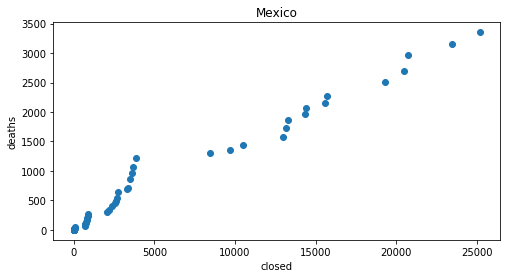

     date  confirmed  deaths  recovered
 2020-5-9     156061   10656      61685
new  confirmed
    9167.0


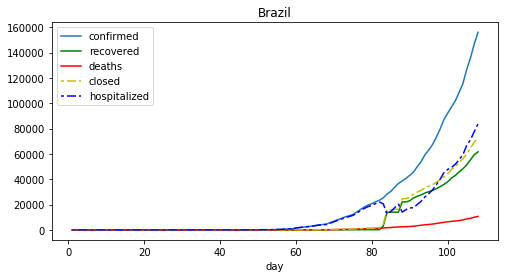

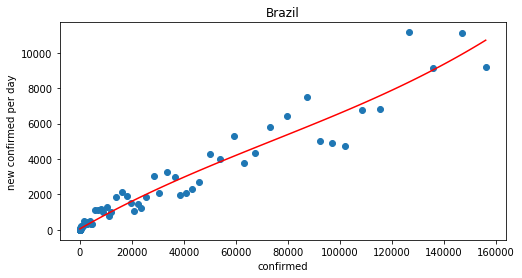

closed:  72341
deaths:  10656
%:  14.730235965773215


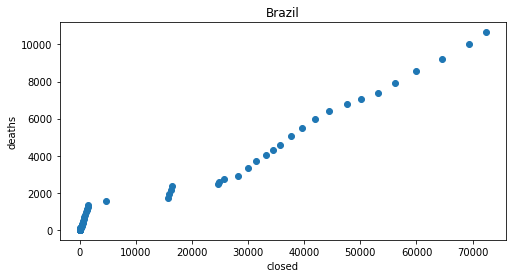

     date  confirmed  deaths  recovered
 2020-5-9       6589     108       4929
new  confirmed
      54.0


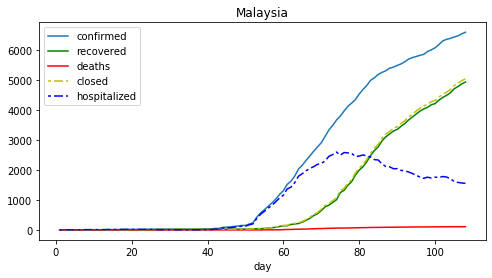

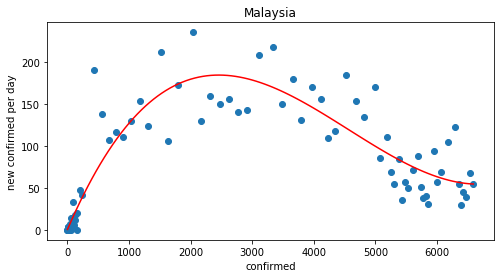

closed:  5037
deaths:  108
%:  2.1441334127456817


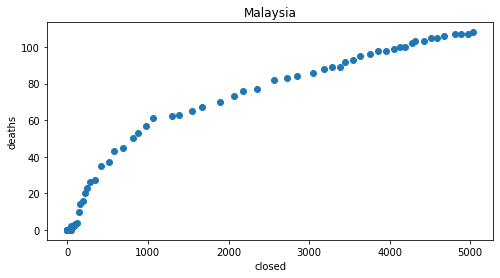

     date  confirmed  deaths  recovered
 2020-5-9      22460      20       2296
new  confirmed
     753.0


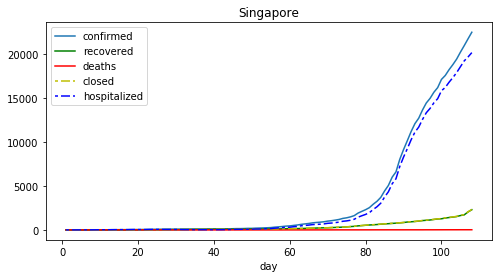

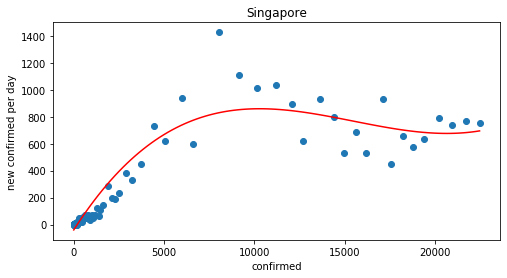

closed:  2316
deaths:  20
%:  0.8635578583765112


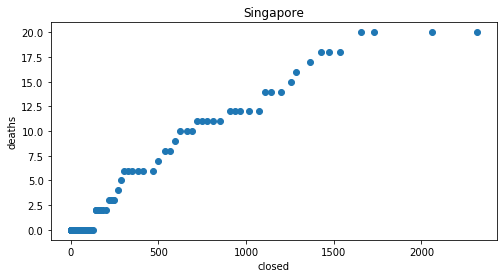

     date  confirmed  deaths  recovered
 2020-5-9      13645     959       2607
new  confirmed
     533.0


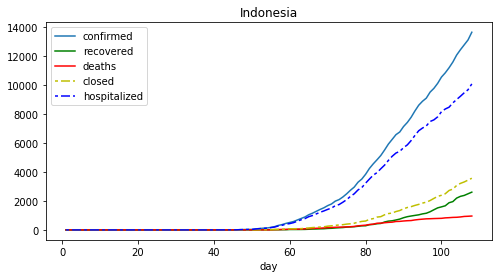

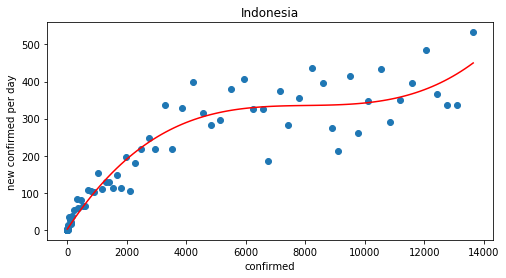

closed:  3566
deaths:  959
%:  26.892877173303418


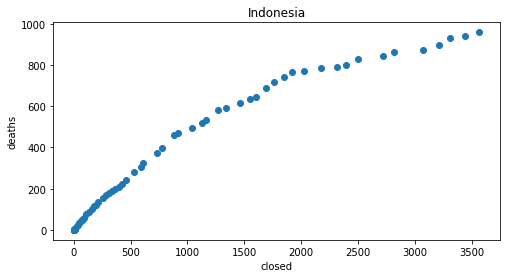

     date  confirmed  deaths  recovered
 2020-5-9    1309550   78795     212534
new  confirmed
   25621.0


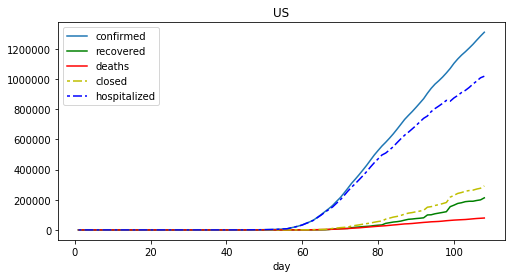

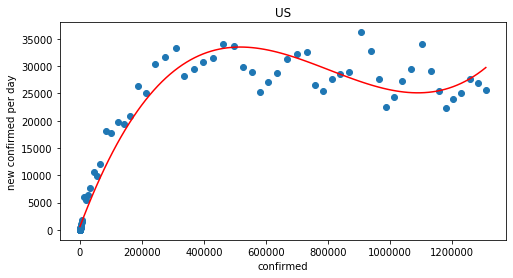

closed:  291329
deaths:  78795
%:  27.046740969831358


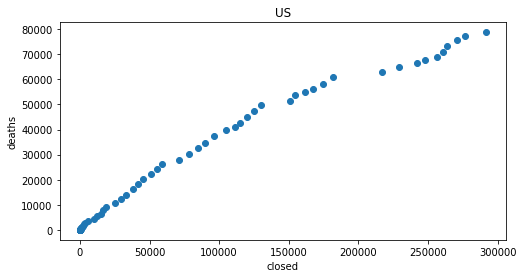

     date  confirmed  deaths  recovered
 2020-5-9      83990    4637      79127
new  confirmed
      14.0


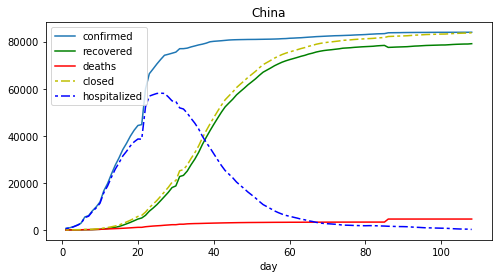

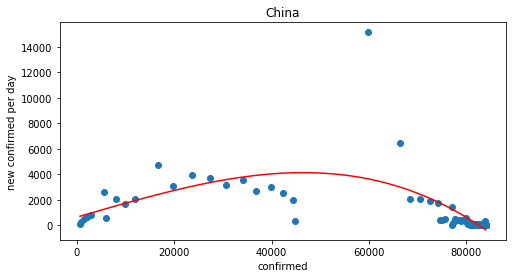

closed:  83764
deaths:  4637
%:  5.535791031946898


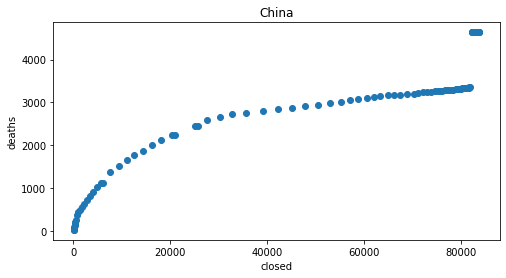

     date  confirmed  deaths  recovered
 2020-5-9      10874     256       9610
new  confirmed
      34.0


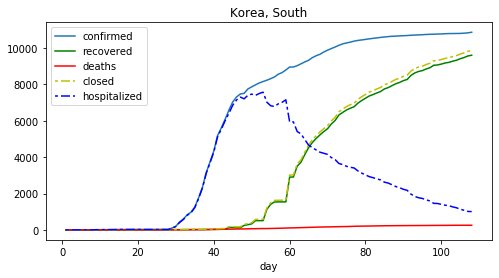

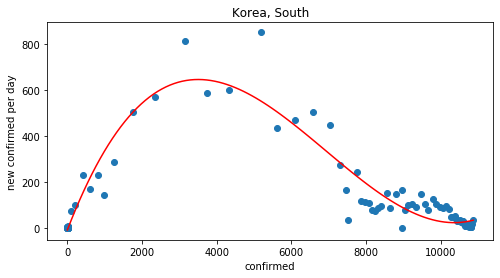

closed:  9866
deaths:  256
%:  2.594769916886276


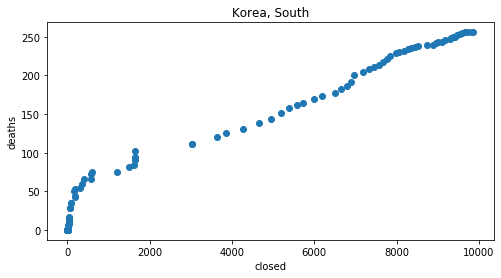

     date  confirmed  deaths  recovered
 2020-5-9     218268   30395     103031
new  confirmed
    1083.0


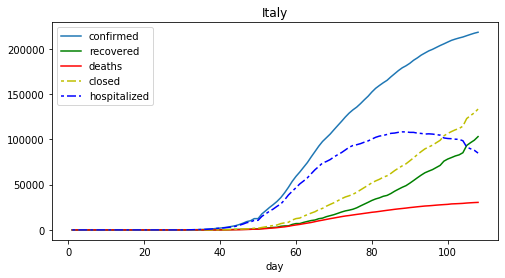

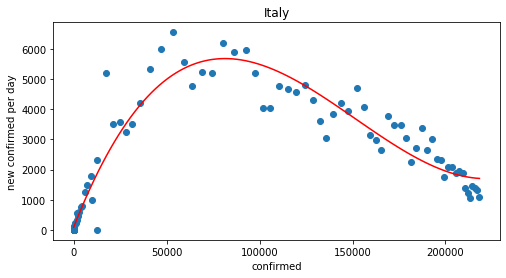

closed:  133426
deaths:  30395
%:  22.780417609761216


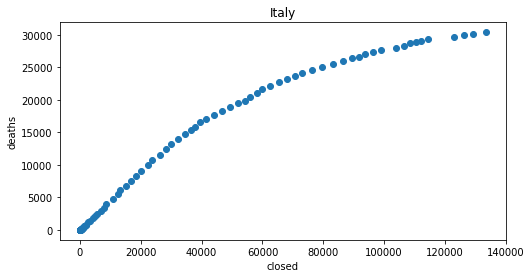

     date  confirmed  deaths  recovered
 2020-5-9     223578   26478     133952
new  confirmed
     721.0


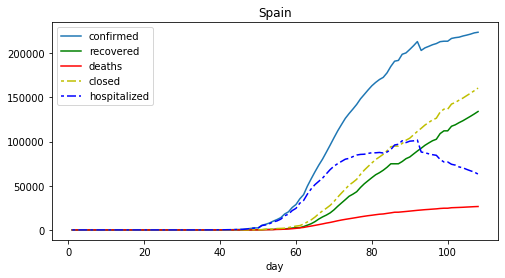

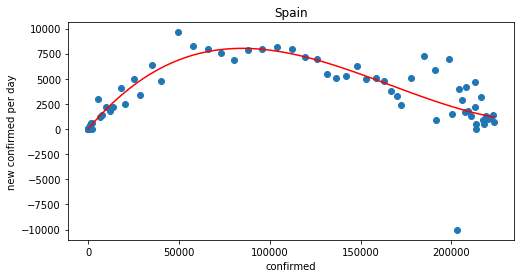

closed:  160430
deaths:  26478
%:  16.504394439942654


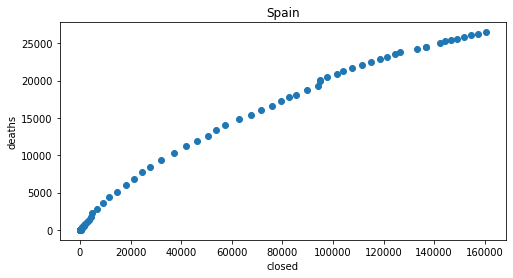

In [4]:
for c in ['Thailand','Russia','Mexico','Brazil','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
